In [1]:
import zipfile
with zipfile.ZipFile('./dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./images')

In [2]:
!pip install tensorflow
!pip install keras

In [3]:
import tensorflow as tf
import keras

In [4]:
PATH = './images/images/collectedimages'
CLASS_NAMES = ['hello', 'fine', 'no', 'thankyou', 'yes']
BATCH_SIZE = 32

In [5]:
dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.
Using 120 files for training.


In [6]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    PATH,
    labels='inferred',
    label_mode='int',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=(180, 180),
    shuffle=True,
    seed=123,
    validation_split=0.2, 
    subset="training",
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 150 files belonging to 5 classes.


Using 120 files for training.


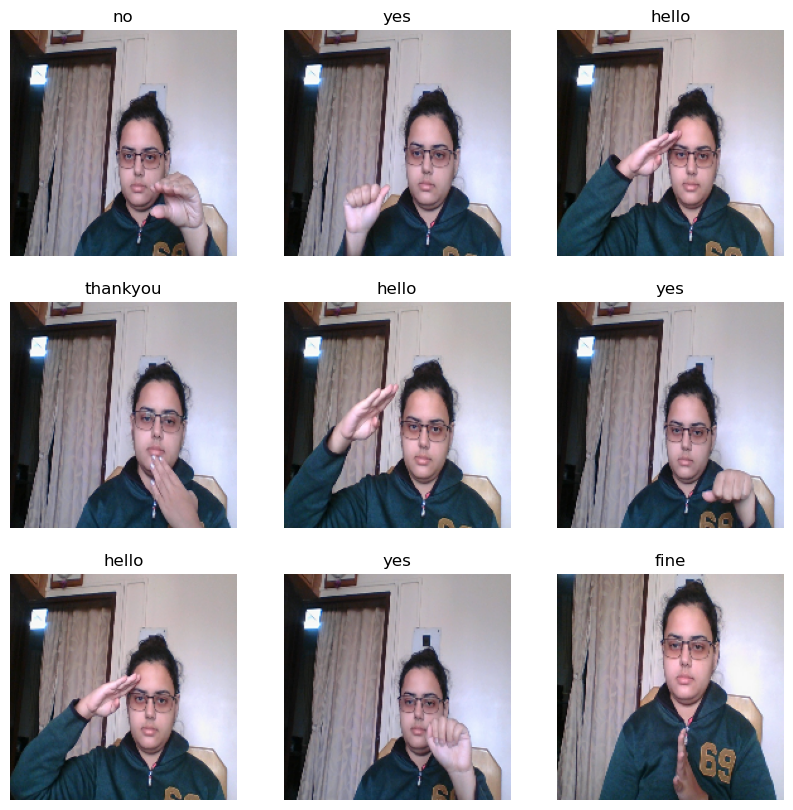

In [7]:
import matplotlib.pyplot as plt

class_names = ['hello', 'fine', 'no', 'thankyou', 'yes']
plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
from tensorflow.keras import layers, models
model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5)
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [16]:
history = model.fit(
  dataset,
  batch_size=BATCH_SIZE,
  validation_data=validation_dataset,
  epochs=10
)

Epoch 1/10
4/4 [==============================] - 1s 202ms/step - loss: 2.2178 - accuracy: 0.1750 - val_loss: 1.5150 - val_accuracy: 0.2000
Epoch 2/10
4/4 [==============================] - 1s 163ms/step - loss: 1.4213 - accuracy: 0.3750 - val_loss: 1.2118 - val_accuracy: 0.5667
Epoch 3/10
4/4 [==============================] - 1s 159ms/step - loss: 1.1612 - accuracy: 0.5167 - val_loss: 1.0094 - val_accuracy: 0.5833
Epoch 4/10
4/4 [==============================] - 1s 160ms/step - loss: 1.0427 - accuracy: 0.5750 - val_loss: 0.9848 - val_accuracy: 0.6750
Epoch 5/10
4/4 [==============================] - 1s 159ms/step - loss: 0.9306 - accuracy: 0.6167 - val_loss: 0.8490 - val_accuracy: 0.7083
Epoch 6/10
4/4 [==============================] - 1s 163ms/step - loss: 0.8428 - accuracy: 0.6083 - val_loss: 0.7074 - val_accuracy: 0.7833
Epoch 7/10
4/4 [==============================] - 1s 172ms/step - loss: 0.6787 - accuracy: 0.7917 - val_loss: 0.5651 - val_accuracy: 0.8167
Epoch 8/10
4/4 [====

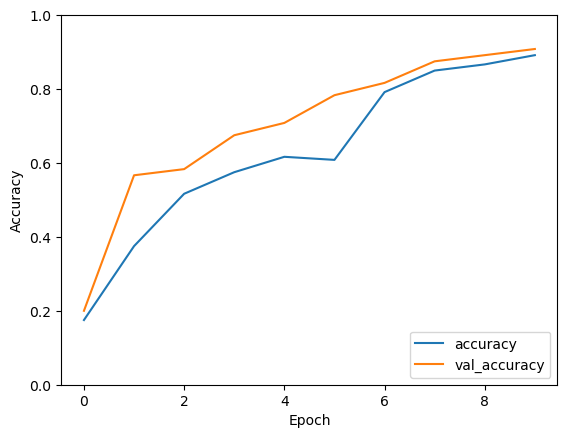

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [18]:
model.save('cnn_10_epochs.h5')

/Users/shaimahaque/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model.save('cnn_10_epochs.keras')